In [1]:
"""
The only difference here is that the entire dataset is used. This makes the model execution much slower, but it also nearly doubles the accuracy of the model
"""

'\nThe only difference here is that the entire dataset is used. This makes the model execution much slower, but it also nearly doubles the accuracy of the model\n'

In [2]:
"""
Run once ever

Downloads and extracts the dataset
"""


# import urllib.request
# import tarfile
# import os

# mp3file = urllib.request.urlopen("https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz")
# with open('tmp','wb') as output:
#   output.write(mp3file.read())

# file = tarfile.open("tmp")
# file.extractall(".")
# file.close()
# os.remove("tmp")
# os.remove("cifar-100-python/file.txt~")

'\nRun once ever\n\nDownloads and extracts the dataset\n'

In [3]:

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
import cv2
from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
#function to read files present in the Python version of the dataset
def unpickle(file):
    with open(file, 'rb') as fo:
        myDict = pickle.load(fo, encoding='latin1')
    return myDict

In [5]:
trainData = unpickle('./cifar-100-python/train')
#type of items in each file
for item in trainData:
    print(item, type(trainData[item]))

filenames <class 'list'>
batch_label <class 'str'>
fine_labels <class 'list'>
coarse_labels <class 'list'>
data <class 'numpy.ndarray'>


In [6]:
testData = unpickle('./cifar-100-python//test')
metaData = unpickle('./cifar-100-python//meta')
#metaData
print("Fine labels:", metaData['fine_label_names'], "\n")
print("Coarse labels:", metaData['coarse_label_names'])

Fine labels: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', '

In [7]:
#storing fine labels along with its number code in a dataframe
subCategory = pd.DataFrame(metaData['fine_label_names'], columns=['SubClass'])
print(subCategory)

         SubClass
0           apple
1   aquarium_fish
2            baby
3            bear
4          beaver
..            ...
95          whale
96    willow_tree
97           wolf
98          woman
99           worm

[100 rows x 1 columns]


In [8]:
# I'm pretty sure this is set up so that dimension 0 is the category
X_train = trainData['data']
X_train = X_train.reshape(len(X_train),3,32,32).transpose(0,2,3,1)

In [9]:
X_test = testData['data']
X_test = X_test.reshape(len(X_test),3,32,32).transpose(0,2,3,1)
#X_test

Image number selected : 29209
Shape of image : (32, 32, 3)
Image subcategory number: 73
Image subcategory name: Shark


/tmp/ipykernel_2544943/2356857472.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Image subcategory name: {}".format(subCategory.iloc[trainData['fine_labels'][imageId]][0].capitalize()))


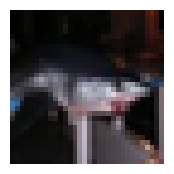

In [10]:
#generating a random number to display a random image from the dataset along with the label's number and name
#setting the figure size
rcParams['figure.figsize'] = 2,2
#generating a random number
imageId = np.random.randint(0, len(X_train))
#showing the image at that id
plt.imshow(X_train[imageId])
#setting display off for the image
plt.axis('off')
#displaying the image id
print("Image number selected : {}".format(imageId))
#displaying the shape of the image
print("Shape of image : {}".format(X_train[imageId].shape))

#displaying the subcategory number
print("Image subcategory number: {}".format(trainData['fine_labels'][imageId]))
#displaying the subcategory name
print("Image subcategory name: {}".format(subCategory.iloc[trainData['fine_labels'][imageId]][0].capitalize()))

In [ ]:
winSize = (32,32)
blockSize = (8,8)
blockStride = (4,4)
# cellSize = (4,4) # original size from Hany
cellSize = (2,2)
nbins = 12


df = []

**Create Database of HOGs** 
(Pandas dataframe)

In [12]:
# this is essentially where we fit the model
for i in range(len(X_train)):
    image = cv2.cvtColor(X_train[i],cv2.COLOR_BGR2GRAY) # convert the colorspace to grayscale
    hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)
    df.append(hog.compute(image))
    
# DF = pd.DataFrame(df)
DF = np.array(df)


In [13]:
DF

array([[0.        , 0.        , 0.00412205, ..., 0.00682359, 0.0028279 ,
        0.06439196],
       [0.00403736, 0.        , 0.        , ..., 0.        , 0.        ,
        0.06546165],
       [0.03661579, 0.02598861, 0.01377351, ..., 0.        , 0.        ,
        0.01730055],
       ...,
       [0.00189616, 0.01049946, 0.02753996, ..., 0.00927464, 0.        ,
        0.01424231],
       [0.00415612, 0.        , 0.        , ..., 0.0133536 , 0.        ,
        0.01345766],
       [0.01931535, 0.02127834, 0.00791567, ..., 0.        , 0.        ,
        0.01045431]], dtype=float32)

****continue work checkpoint: standardize test data and proceed****

In [14]:
def predict(img,k):
    
    #Extract sample's features
    
    sample = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)
    _hog = hog.compute(sample)
    
    #Get Nearest Neighbors
    distances = []
    for i in range(len(DF)):
        distances.append(np.linalg.norm(_hog - DF[i]))         # 1- Calculate and store each datapoint's Euclidean distance
        
    kNNsID = np.argsort(distances)[:k]                              # 2- Sort distances' IDs in an ascending order
    
    kNNsCats = []
    for i in kNNsID:
        kNNsCats.append(subCategory.iloc[trainData['fine_labels'][i]][0].capitalize())      # 3- Get categories of each of the NNs
    
    CommonCat = Counter(kNNsCats).most_common(1)                    # 4- Count and get Most common category
    
    return CommonCat

In [15]:
n = 25
p = predict(X_test[n], 20)

/tmp/ipykernel_2544943/2469714259.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kNNsCats.append(subCategory.iloc[trainData['fine_labels'][i]][0].capitalize())      # 3- Get categories of each of the NNs


In [16]:
def getAccuracy(k,x_test,testdata):
    RightCount = 0
    preds = []
    for i in range(len(x_test)):
        #print("1")
        pred = predict(x_test[i], k)
        #print("2")
        if pred[0][0] == subCategory.iloc[testdata['fine_labels'][i]][0].capitalize():
            #print("3")
            RightCount += 1
            #print("4")
        print("Done: {}, Accuracy: {}".format(i, (RightCount / (i + 1)) * 100))
        preds.append(pred)
    return preds

In [17]:
Preds14, Accuracies = getAccuracy(10, X_test, testData) # took 45 minutes to run on my laptop
# IF YOU USE A DATAFRAME FOR DF as Hany orginally did:
# would take ~8 hours to test on the entire test set
# It's only single threaded, so I want to multi thread it so that its not so *slow*
# accuracy on first 1000 test images is 20.979%

# if you use an array for DF, then it only takes ~40 minutes for the entire test set

/tmp/ipykernel_2544943/2469714259.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kNNsCats.append(subCategory.iloc[trainData['fine_labels'][i]][0].capitalize())      # 3- Get categories of each of the NNs
/tmp/ipykernel_2544943/3025265952.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pred[0][0] == subCategory.iloc[testdata['fine_labels'][i]][0].capitalize():


Done: 0, Accuracy: 0.0
Done: 1, Accuracy: 50.0
Done: 2, Accuracy: 33.33333333333333
Done: 3, Accuracy: 25.0
Done: 4, Accuracy: 40.0
Done: 5, Accuracy: 33.33333333333333
Done: 6, Accuracy: 28.57142857142857
Done: 7, Accuracy: 25.0
Done: 8, Accuracy: 22.22222222222222
Done: 9, Accuracy: 20.0
Done: 10, Accuracy: 18.181818181818183
Done: 11, Accuracy: 16.666666666666664
Done: 12, Accuracy: 15.384615384615385
Done: 13, Accuracy: 14.285714285714285
Done: 14, Accuracy: 20.0
Done: 15, Accuracy: 18.75
Done: 16, Accuracy: 17.647058823529413
Done: 17, Accuracy: 16.666666666666664
Done: 18, Accuracy: 15.789473684210526
Done: 19, Accuracy: 15.0
Done: 20, Accuracy: 14.285714285714285
Done: 21, Accuracy: 13.636363636363635
Done: 22, Accuracy: 13.043478260869565
Done: 23, Accuracy: 12.5
Done: 24, Accuracy: 12.0
Done: 25, Accuracy: 15.384615384615385
Done: 26, Accuracy: 18.51851851851852
Done: 27, Accuracy: 21.428571428571427
Done: 28, Accuracy: 20.689655172413794
Done: 29, Accuracy: 20.0
Done: 30, Acc

ValueError: too many values to unpack (expected 2)

In [ ]:
TruePreds = []

for i in range(1000):
    TruePreds.append(subCategory.iloc[testData['fine_labels'][i]][0].capitalize())

/tmp/ipykernel_4120/3796635586.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  TruePreds.append(subCategory.iloc[testData['fine_labels'][i]][0].capitalize())


In [ ]:
Predicted = []
for i in range(len(Preds14)):
    Predicted.append(Preds14[i][0][0])

In [ ]:
cm = confusion_matrix(TruePreds, Predicted)

In [ ]:
x = np.array(TruePreds)
len(np.unique(x))

100

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = np.unique(x), 
                     columns = np.unique(x))

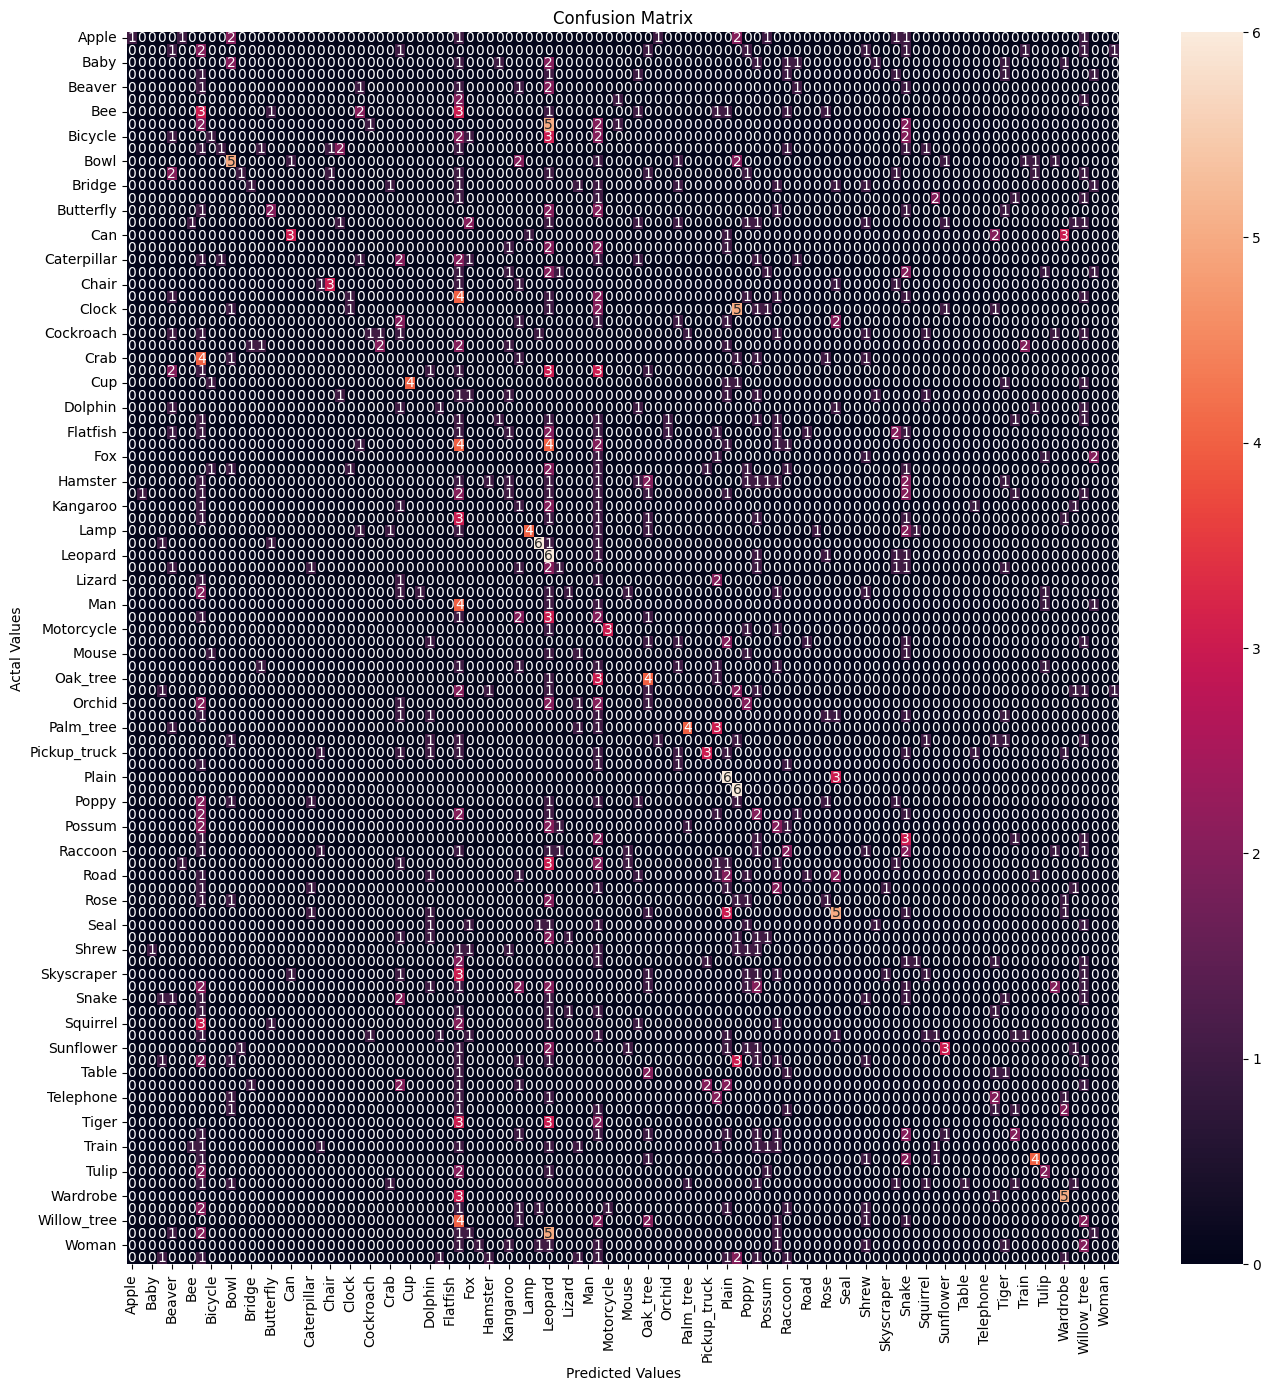

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()